In [26]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import scipy as sp
import pickle

import warnings
warnings.filterwarnings("ignore")

In [27]:
# Paste the path to the dataset and load the dataset.
df = pd.read_csv(r"data\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [29]:
# Drop unnecessary column
df.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [30]:
# Check for missing values and duplicates
print("Missing values:\n", df.isna().sum())
print("\nDuplicated rows:", df.duplicated().sum())

Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Duplicated rows: 0


In [31]:
# Explore the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


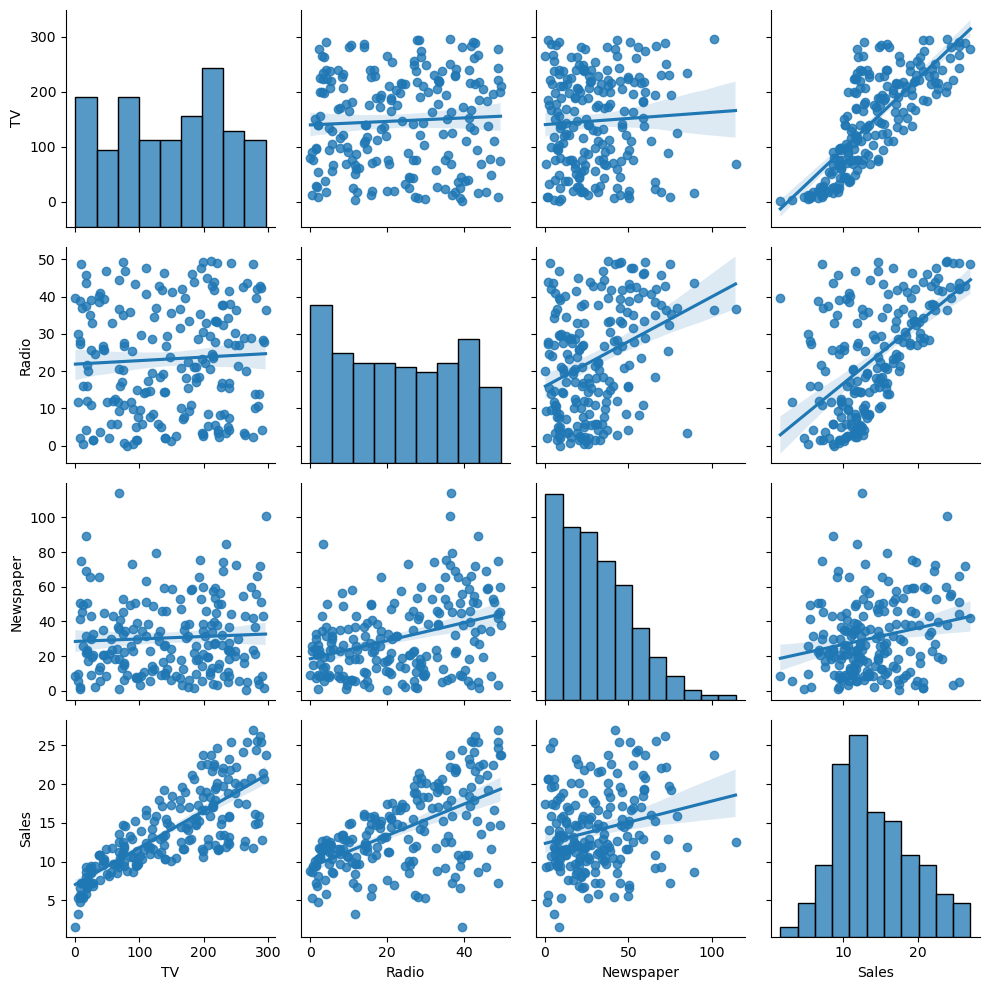

In [32]:
# Visualize relationships and distributions
sns.pairplot(data= df, kind='reg')
plt.tight_layout()
plt.show()

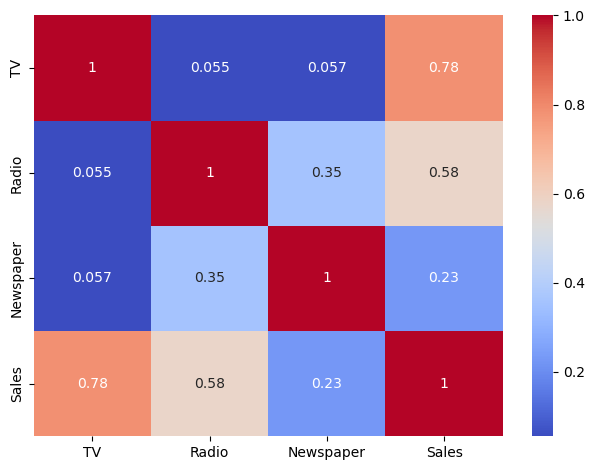

In [33]:
# Visualize heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

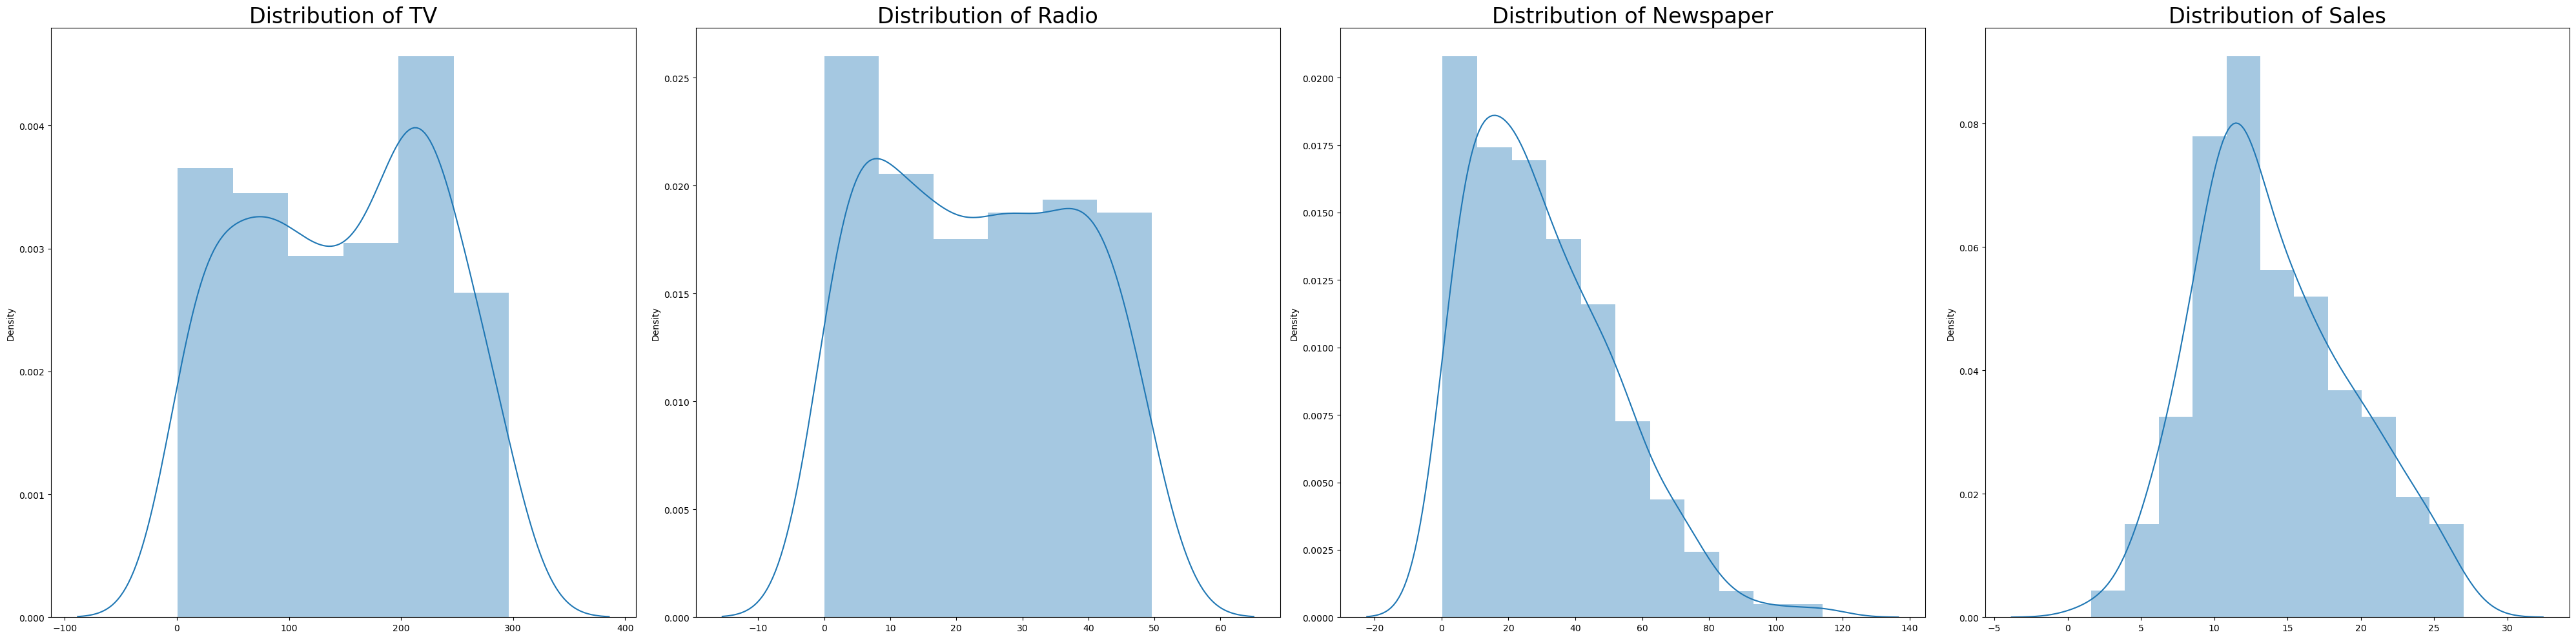

In [34]:
# Visualize distributions using subplots
nrows, ncols = 1, 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*10))

for i, j in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    sns.distplot(x=df[j], ax=axes[i])
    axes[i].set_title(f'Distribution of {j}', fontsize=24)

plt.tight_layout()
plt.show()

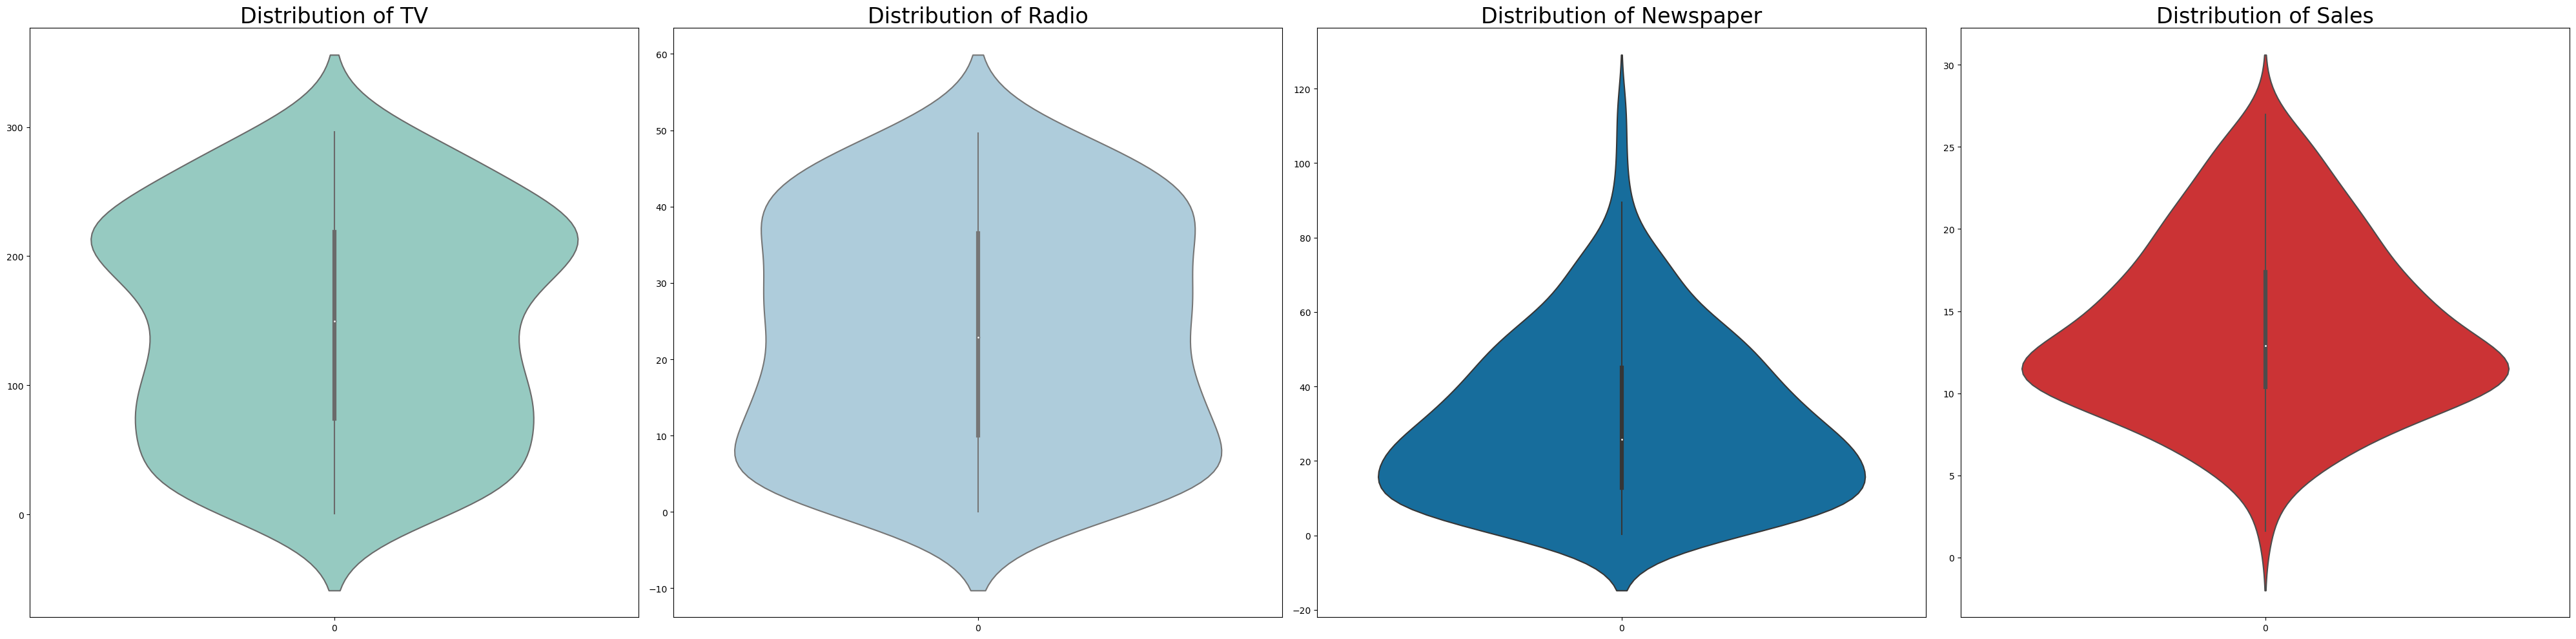

In [35]:
# Visualize distributions using subplots with different color palettes
nrows, ncols = 1, 4
color_palettes = ["Set3", "Paired", "colorblind", "Set1", "dark"]
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*10))

for i, (j, palette) in enumerate(zip(df.select_dtypes(include=['int64', 'float64']).columns, color_palettes)):
    sns.violinplot(df[j], ax=axes[i], palette=sns.color_palette(palette))
    axes[i].set_title(f'Distribution of {j}', fontsize=24)

plt.tight_layout()
plt.show()

In [36]:
# Check for multicollinearity
col_lst = [col for col in df.columns if df[col].dtype != 'object' and col != 'Sales']
vif = pd.DataFrame({'Features': col_lst, 'VIF': [variance_inflation_factor(df[col_lst].values, i) for i in range(len(col_lst))]})
vif.reset_index(drop=True, inplace=True)
vif

,Features,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


In [37]:
# Split data into features and target
X = df.drop(['Sales'], axis=1)
y = df['Sales']

In [38]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
# Scale the features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [40]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
# Make predictions on the test set
y_pred = lr.predict(X_test_scaled)

In [42]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
# Display metrics
print(f"R-squared (R2): {round(r2,2)}")
print(f"Mean Absolute Error (MAE): {round(mae, 2)}")
print(f"Mean Squared Error (MSE): {round(mse,2)}")

R-squared (R2): 0.86
Mean Absolute Error (MAE): 1.49
Mean Squared Error (MSE): 3.73


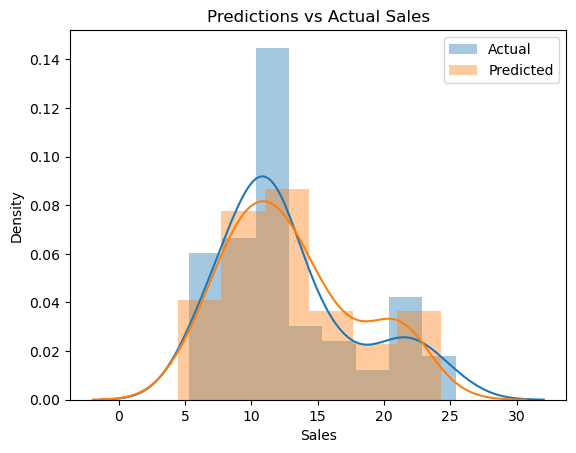

In [44]:
# Visualize the predictions
sns.distplot(y_test, label ='Actual')
sns.distplot(y_pred, label ='Predicted')
plt.title("Predictions vs Actual Sales")
plt.legend()
plt.show()

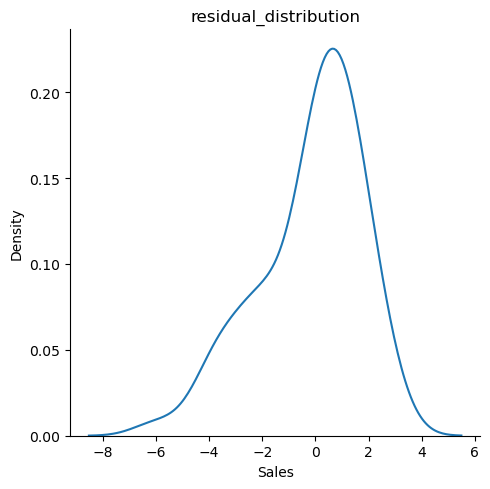

In [45]:
# Visualize the residuals
residual = y_test - y_pred
sns.displot(residual,kind='kde')
plt.title("residual_distribution")
plt.tight_layout()
plt.show()

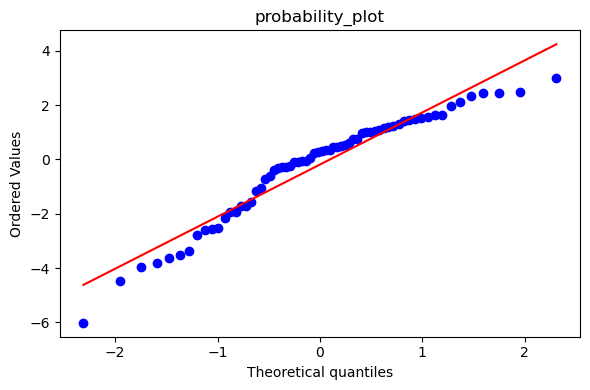

In [46]:
# Probability plot of residuals
fig,ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual,plot=ax,fit=True)
plt.title("probability_plot")
plt.tight_layout()
plt.show()

In [47]:
# Save the trained model to a file using pickle
model_to_save = lr
with open(r'Sales_model.pkl','wb') as model_file:
    pickle.dump(model_to_save, model_file)

## Conclusion 🏁

In conclusion, the Linear Regression model demonstrates a robust predictive capability, as indicated by the high R-squared value of 86%. The mean absolute error (MAE) and mean squared error (MSE) metrics further validate the model's accuracy in predicting sales based on advertising budgets.

### Final Thoughts:
- Continuous model updates with new data are recommended for improved accuracy.
- Exploring additional features or refining existing ones could enhance predictive power.
- Engaging domain experts can provide deeper insights for further model optimization.

10 basic questions that align with the concepts covered in the code.

1. **What is Linear Regression, and how does it work in the context of machine learning?**

2. **Can you explain the difference between Simple Linear Regression and Multiple Linear Regression?**

3. **How do you measure the performance of a Linear Regression model?**

4. **What is the role of the cost function in Linear Regression, and can you name a specific cost function used in this context?**

5. **Explain the concept of feature scaling and why it's important in Linear Regression.**

6. **How does Linear Regression handle multicollinearity, and why is it important to address this issue?**

7. **What are some common assumptions that Linear Regression makes about the data?**

8. **What is the purpose of the coefficients in a Linear Regression model, and how are they determined during training?**

9. **Can you discuss the limitations of Linear Regression as a machine learning algorithm?**

10. **How would you interpret the results of a Linear Regression model to a non-technical audience, such as stakeholders or clients?**